# Honey Production in the US

## Import the Required Libraries and Honey Production Dataset 

In [1]:
import math
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
path = 'C:\\Users\\ASUS\\Downloads\\'

In [2]:
df = pd.read_csv(path +'honeyproduction.csv')
df.iloc[:2,:]

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998


### Data Cleaning

#### Action 1: Cleaning Missing or Irrelevant Values

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [257]:
# Verify to check if null-values were residing somehwere in my data
df.isna().sum()

# Hence, nonull values were found

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [259]:
dupes = df[df.duplicated()]
dupes

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year


Meaning, no duplicates were found in our data

In [122]:
# shape of a dataframe
df.shape

(626, 8)

In [123]:
# check for columns present in a dataframe
print(df.columns)

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')


In [27]:
df.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

In [7]:
# Datatypes for each column
df.dtypes.value_counts()

float64    5
int64      2
object     1
dtype: int64

In [8]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


Inferences:
1. Number of colonies in every state are spread over a huge range. Ranging from 2000 to 510000.
2. The mean numcol is close to the 75% percentile of the data, indicating a right skew.
3. We noticed that the standard deviation of numcol is very high
4. yieldpercol - Yield per colony also has huge spread ranging from 19 pounds to 136 pounds.
5. Infact, all the variable seem to have a huge range, we will have to investigate furthur if this spread is mainly across different states or varies in the same state over the years.

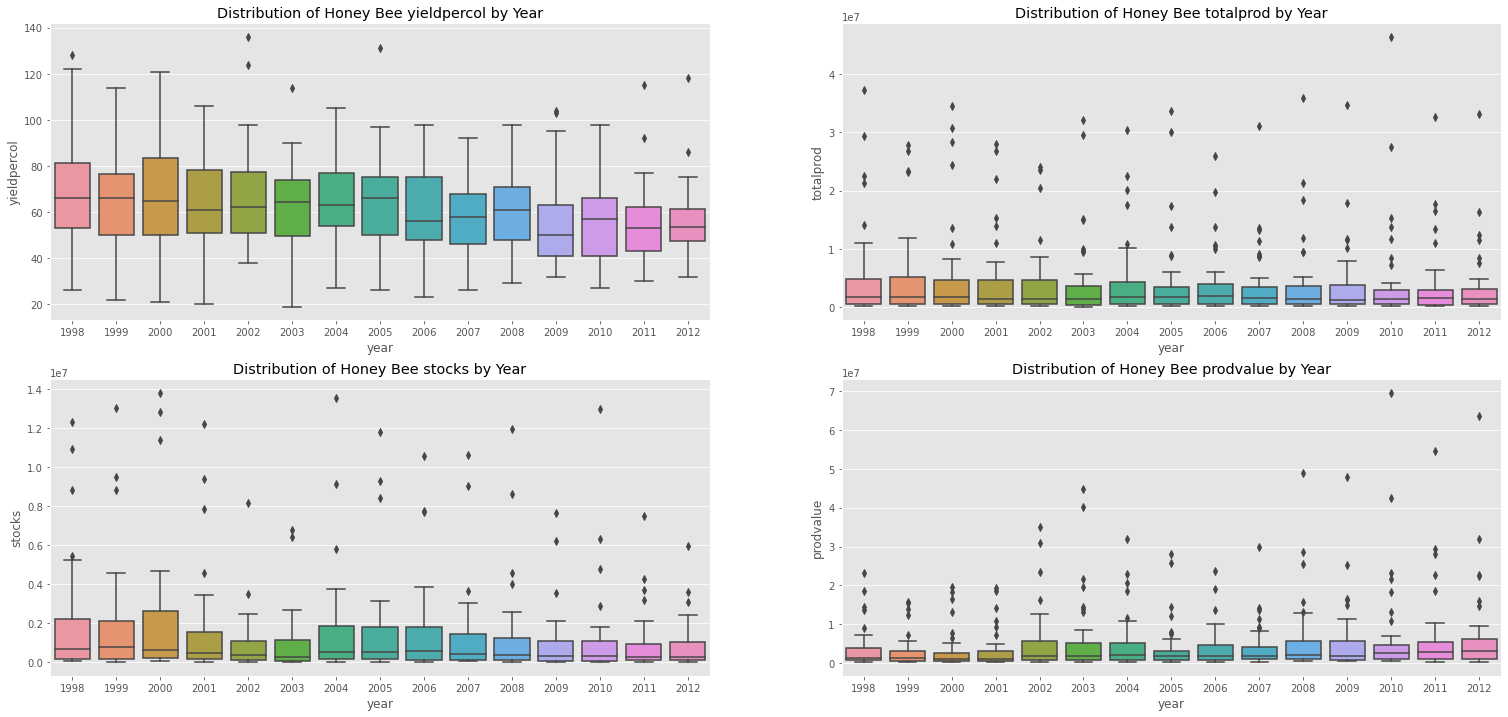

In [219]:
# plot distribution of Honey Bee totalprod, stocks, priceperlb and prodvalue by year

# list of column names we want to plot
ls = ['yieldpercol', 'totalprod', 'stocks','prodvalue']
graph_num = 1

fig = plt.figure(figsize=(26,12))

for i in ls:
    ax = plt.subplot(2, 2, graph_num)
    sns.boxplot(x='year', y=i, data=df)
    plt.title(f'Distribution of Honey Bee {i} by Year')
    graph_num += 1

plt.show()

#### Action 2: Analysis Bee Production in the US from 1998 to 2012 and Data Standardization

Now, let us compute the average stocks, production, and the average price per lb (pounds) year-wise

In [228]:
f_avg = df.copy()
def honey_prod_avg_values(df1):
    av = {}
    
    av['avg_production'] = f_avg['totalprod'].mean()
    av['avg_stocks'] = f_avg['stocks'].mean()
    av['avg_price_per_lb'] = f_avg['priceperlb'].mean()
    av['avg_prod_value'] = f_avg['prodvalue'].mean()
    return pd.Series(av,index = ['avg_stocks','avg_production','avg_price_per_lb','avg_prod_value'])

f_avg = f_avg.groupby(['year']).apply(honey_prod_avg_values).reset_index()
f_avg.head()

,year,avg_stocks,avg_production,avg_price_per_lb,avg_prod_value
0,1998,1.318859e+06,4.169086e+06,1.409569,4.715741e+06
1,1999,1.318859e+06,4.169086e+06,1.409569,4.715741e+06
2,2000,1.318859e+06,4.169086e+06,1.409569,4.715741e+06
3,2001,1.318859e+06,4.169086e+06,1.409569,4.715741e+06
4,2002,1.318859e+06,4.169086e+06,1.409569,4.715741e+06


To make the data look clear, we can convert avg_stocks, avg_production, and avg_prod_value to integral values 

In [245]:
f_avg['avg_stocks'] = f_avg['avg_stocks'].astype('int64')
f_avg['avg_production'] = f_avg['avg_production'].astype('int64')

In [246]:
f_avg[['avg_production','avg_stocks','avg_price_per_lb']].dtypes

avg_production        int64
avg_stocks            int64
avg_price_per_lb    float64
dtype: object

In [247]:
f_avg.head()

,year,avg_stocks,avg_production,avg_price_per_lb,avg_prod_value
0,1998,1318859,4169086,1.409569,4.715741e+06
1,1999,1318859,4169086,1.409569,4.715741e+06
2,2000,1318859,4169086,1.409569,4.715741e+06
3,2001,1318859,4169086,1.409569,4.715741e+06
4,2002,1318859,4169086,1.409569,4.715741e+06


In [251]:
df_out = f_avg.copy()
df_out[["avg_production",'avg_stocks','avg_price_per_lb']] = df_out[["avg_production",'avg_stocks','avg_price_per_lb']].apply(np.log)
df_out.head(2)

,year,avg_stocks,avg_production,avg_price_per_lb,avg_prod_value
0,1998,14.092278,15.243207,0.343284,4.715741e+06
1,1999,14.092278,15.243207,0.343284,4.715741e+06


In [252]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [253]:
std_df_out = df_out.copy()
categ = ['avg_production','avg_stocks','avg_price_per_lb']
std_df_out[categ] = std_scale.fit_transform(std_df_out[categ])
std_df_out.head()

,year,avg_stocks,avg_production,avg_price_per_lb,avg_prod_value
0,1998,1.776357e-15,3.552714e-15,-5.551115e-17,4.715741e+06
1,1999,1.776357e-15,3.552714e-15,-5.551115e-17,4.715741e+06
2,2000,1.776357e-15,3.552714e-15,-5.551115e-17,4.715741e+06
3,2001,1.776357e-15,3.552714e-15,-5.551115e-17,4.715741e+06
4,2002,1.776357e-15,3.552714e-15,-5.551115e-17,4.715741e+06


### Data Visualization

Now, I will be looking at the relationship between numerical variables via heatmap correlation matrix 

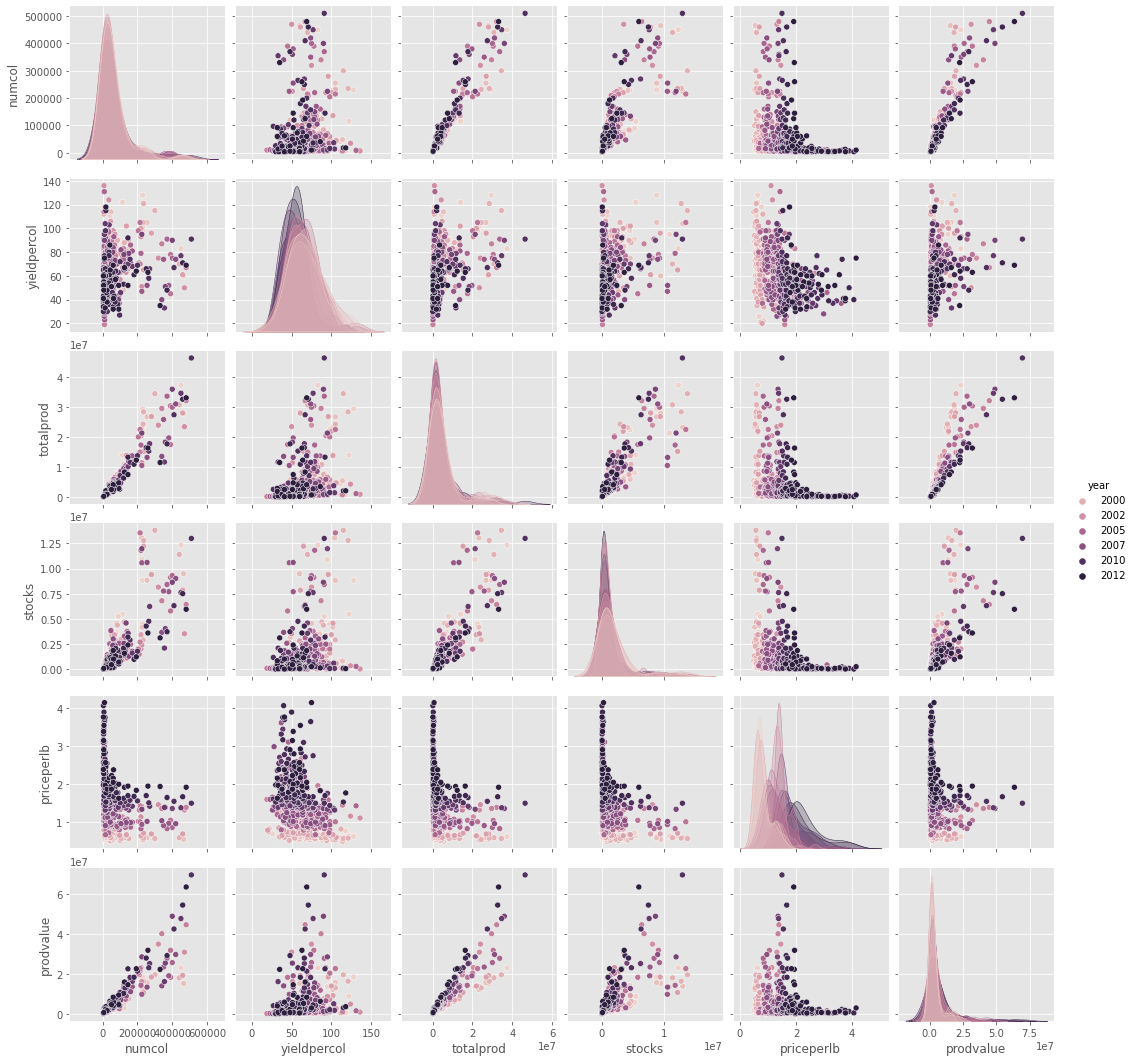

In [229]:
sns.pairplot(df, hue ='year', vars = ['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb','prodvalue'])
plt.show()

<AxesSubplot:>

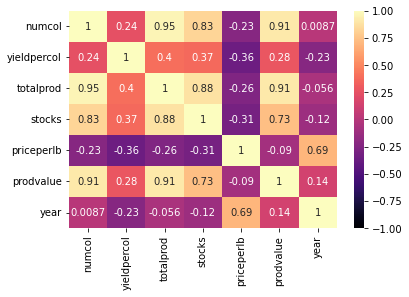

In [13]:
crrdf = df.corr()
crrdf

sns.heatmap(crrdf, annot=True, cmap='magma', vmin=-1, vmax=1)

Inferences:
1. Strong positive correlation of Numcol can be seen between the following attributes:
With total production - 0.95
With prodvalue - 0.91
With stocks - 0.88

Similarly, prodvalue and totalprod - 0.91

2. Yield per colony does not have a high correlation with any of the features that we have in our dataset, we can see the same in the case for priceperlb

Checking for unique values

In [14]:
print(df.state.nunique())
print(df.year.nunique())

44
15


We have honey production data for 44 US states over a span of 15 years, from 1998 to 2012.

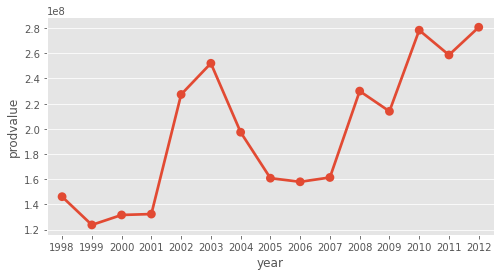

In [156]:
plt.figure(figsize = (8,4))
sns.pointplot(x='year', y='prodvalue', data=df, estimator=sum, ci=None)
plt.xticks(rotation=0) 
plt.show()

##### Inferences:
It can be observed that there is in flattened production value from 1999 to 2001. A sharp rise from 2001 to 2004.

Then constant from 2004 to  2007, then increase-decrease pattern is seen from 2007 till 2012

##### Variation of Total Production Year-by-Year

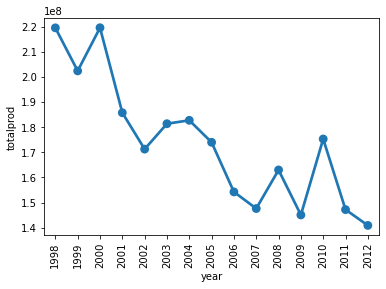

In [72]:
sns.pointplot(x='year', y='totalprod', data=df, estimator= sum, ci=None)
plt.xticks(rotation=90)
plt.show()

##### Inferences:

The above trend shows a decline in the total honey productioh from 2008 to 2012 in the US

The total production over the years can be calculated by the following formula:

Total honey production = number of colonies * average yield per colony

Now, we need to check if the factors such as numcol and average yieldpercol affected the total honey production, now, let us check this

##### Variation of Honey Bee Numcols Year-by-Year

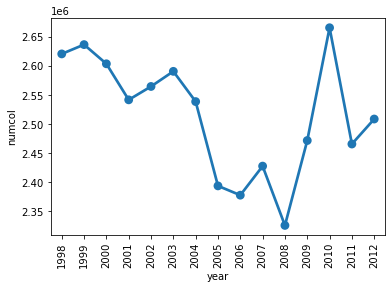

In [78]:
sns.pointplot(x='year', y='numcol', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90) 
plt.show()

##### Inferences:
The above count plot for number of honey bee colonies with year shows the decreasing trend from 1998 to 2008. 
2008 is the point after which colonies started rising again

Meaning, some modifications were done that helped in increasing the "Honey" production from 2008 to 2012. 

##### Variation of Honey Yield Year-by-Year

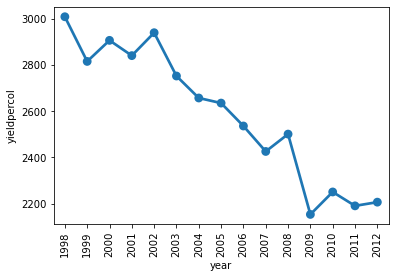

In [71]:
sns.pointplot(x='year', y='yieldpercol', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90) 
plt.show()

##### Inferences:

From 1998 to 2001, there was a decrease, then an increase was seen in 2002, however, after 2002, a continuous decrease was seen till 2007.  A rise in 2008. Again, the decrease was seen till 2012.

Hence, for the above formula for The Total Honey Production, teh honey production is getting affected by the 'Yieldpercol' not by 'Numcol'

Now, if I want to see state-wise total production on yearly basis, I was able to view the following trend

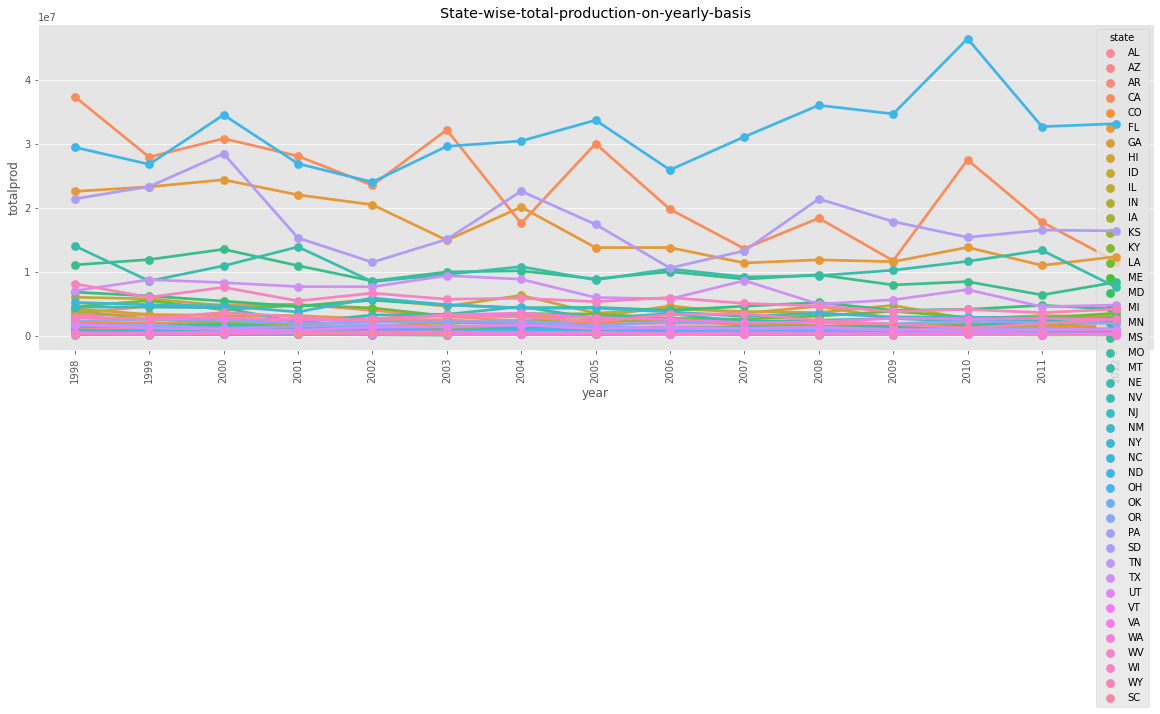

In [217]:
plt.figure(figsize = (20,6)) # To resize the plot
sns.pointplot(x='year', y='totalprod', data=df, estimator=sum,hue = 'state')
plt.title('State-wise-total-production-on-yearly-basis')
plt.xticks(rotation=90) 
plt.show()

The above pointplot on state-wise total honey production on yearly-basis shows a lot of confusion, so we will check the individual total production using 'Catplot'

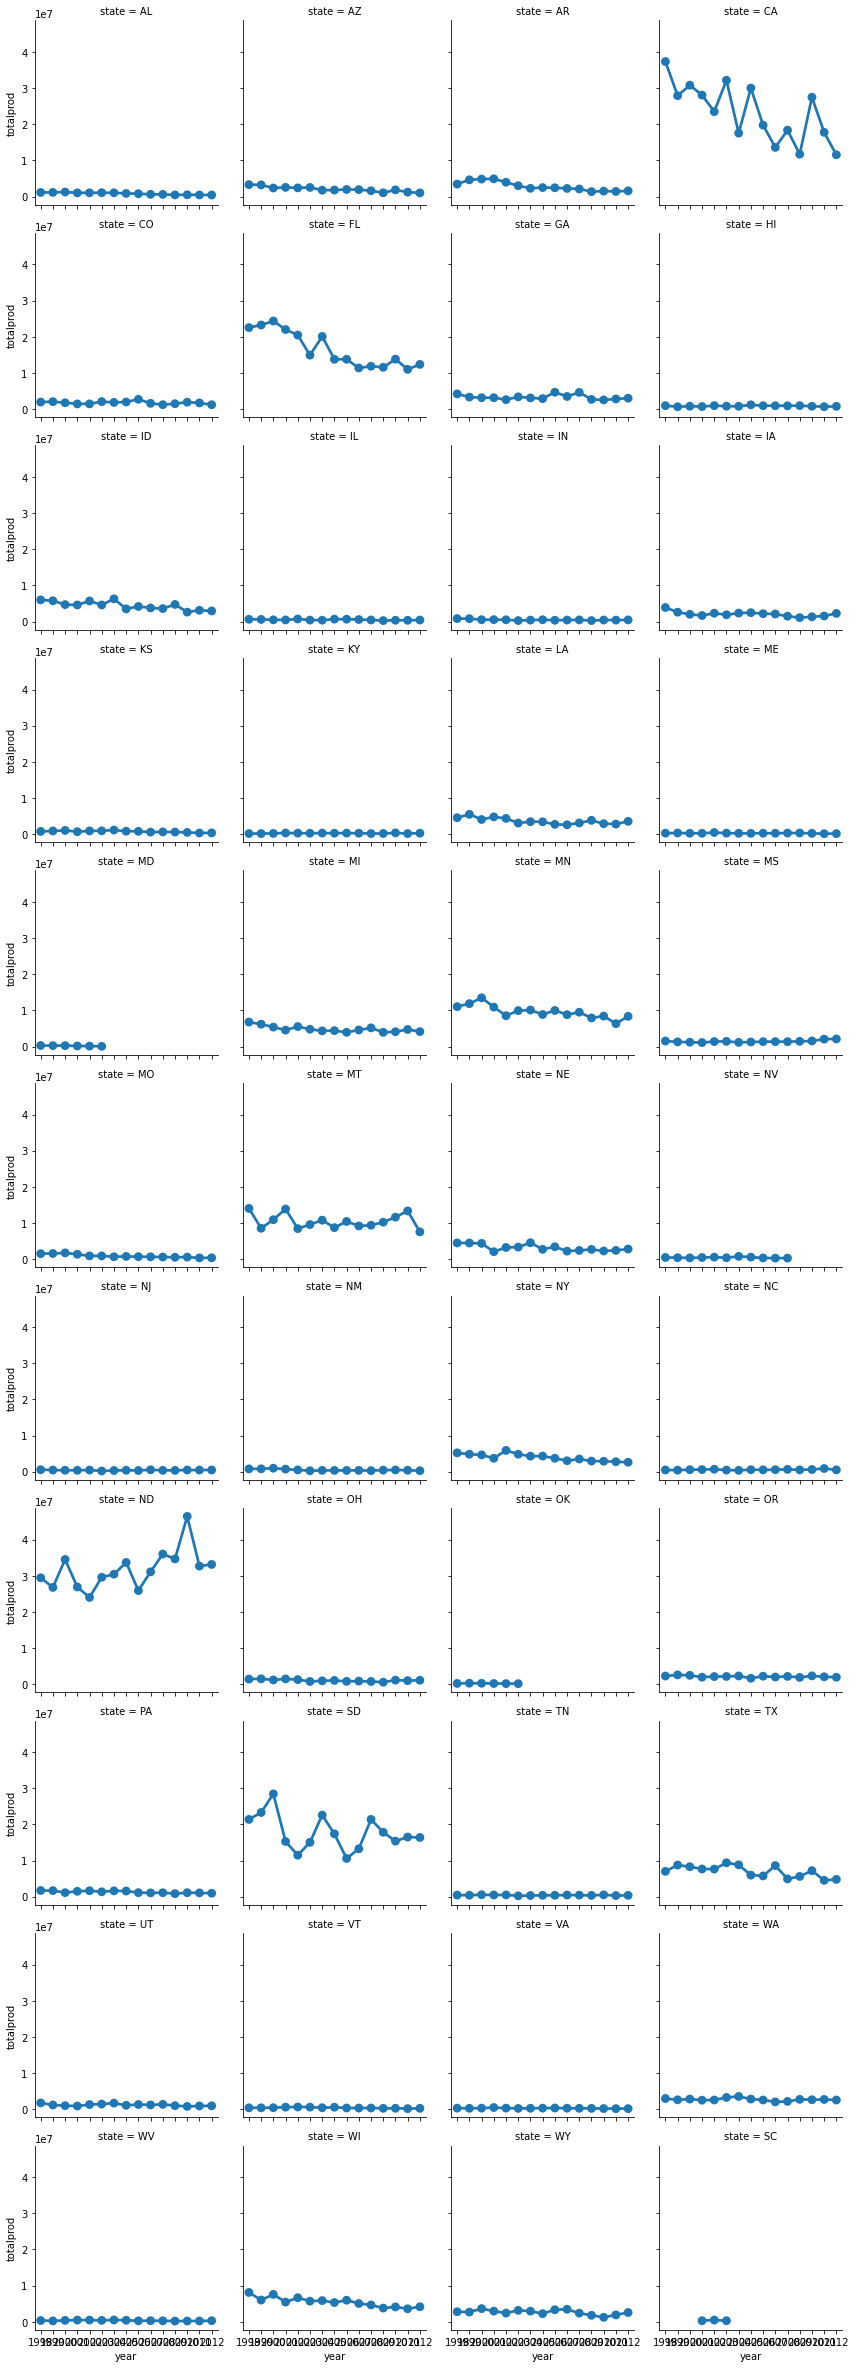

In [95]:
sns.catplot(x='year', y='totalprod', data=df,estimator=sum, col='state', kind="point", height=3,col_wrap = 4)

##### Inferences:
With regards to honey production, the states we need to focus on are ND, SD, FL, and CA
1. Only state 'ND' showed a "perfect" increase in the total production then some decrease later on
2. SD showed increase from 1998, reached the peak at 2000, then lowest at 2002, then incerae, then decrease and reached stability in the last years, i.e., 2011 and 2012
3. State CA showed a declining trend in the total production over the years
4. State FL showed increase in an year at the middle, but continuously, it shows a decreasing trend 

Now, let us how much each honey colony  yields in these four states: ND, SD, FL, CA

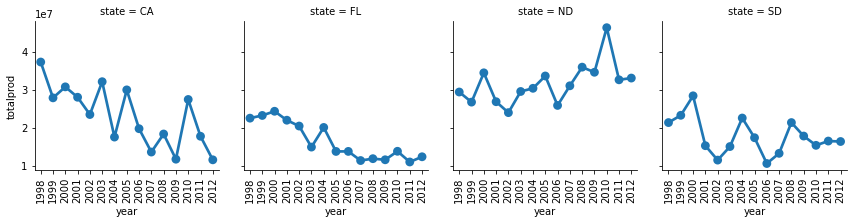

In [3]:
q =sns.catplot(x='year', y='totalprod', 
            data=df[df["state"].isin(["ND", "SD", "FL","CA"])],
                estimator=sum, col='state', kind="point",
                height=3,col_wrap = 5)
q.set_xticklabels(rotation=90)
plt.show()

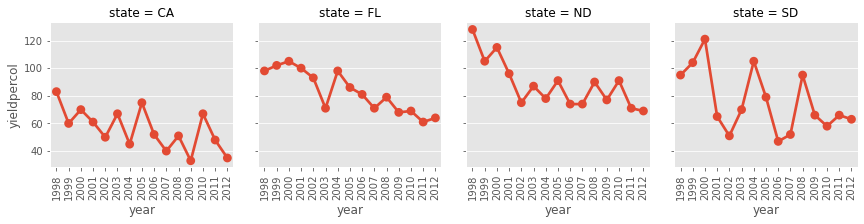

In [273]:
q =sns.catplot(x='year', y='yieldpercol', 
            data=df[df["state"].isin(["ND", "SD", "FL","CA"])],
                estimator=sum, col='state', kind="point",
                height=3,col_wrap = 5)
q.set_xticklabels(rotation=90)
plt.show()

##### Inferences:

Above, we noticed that the total production for ND was the highest, but yield per col is at the peak in 1998, which is now shown decreasing.

Hence, all four states show decreasing trend for yield per colony, year-wise

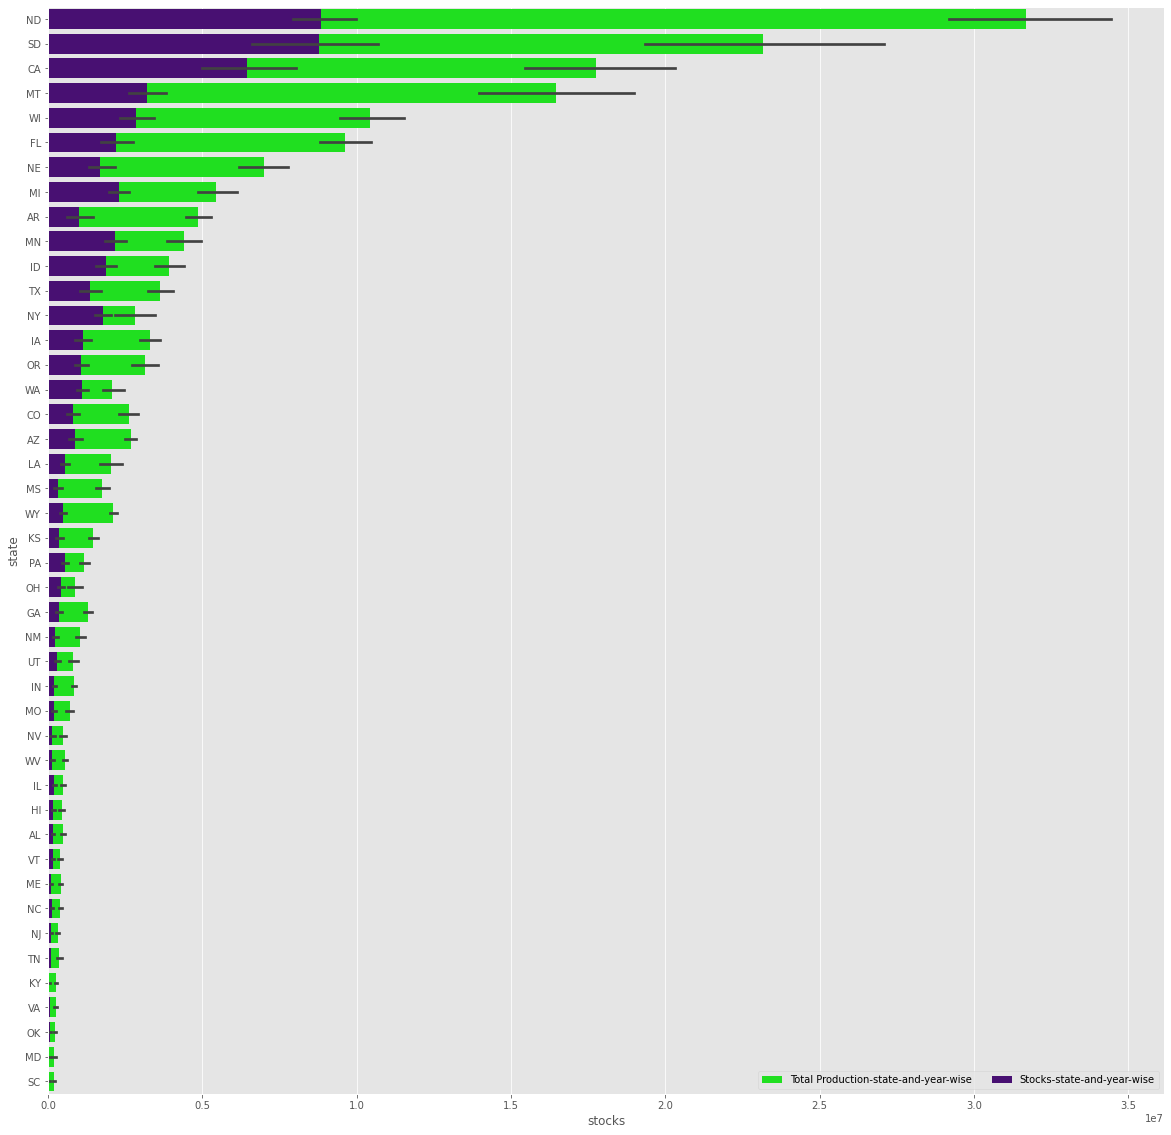

In [207]:
plt.figure(figsize = (20,20))
# plt.style.use('ggplot')
sns.barplot(x="totalprod", y="state", data=df.sort_values("totalprod", ascending=False),
            label="Total Production-state-and-year-wise", color="lime")
sns.barplot(x="stocks", y="state", data=df.sort_values("stocks", ascending=False),
            label="Stocks-state-and-year-wise", color="indigo")

plt.legend(ncol=2, loc="lower right")
plt.xticks(rotation = 0)
plt.show()

The order of the high total production state wise was seen as:
1. ND
2. SD
3. CA
4. MT
5. WI
6. FL
7. NE
8. MI

Now, the stocks out of the total production state-wise can be seen as:
1. ND, SD Equal
2. CA
3. MT
4. WI
5. MI, MN Equal
6. FL
7. ID, NY Equal
8. TX

Hence, the states like ND, SD, CA, MT, WI, FL, NE, and MI are giving a clear visualization on Honey production, while the rest states doesn't show a clarity (they are just stable in their production)
Now, I would like to check the average price of honey per pound across these states. For this, I need to compute the mean of the priceperpound and that too state-wise

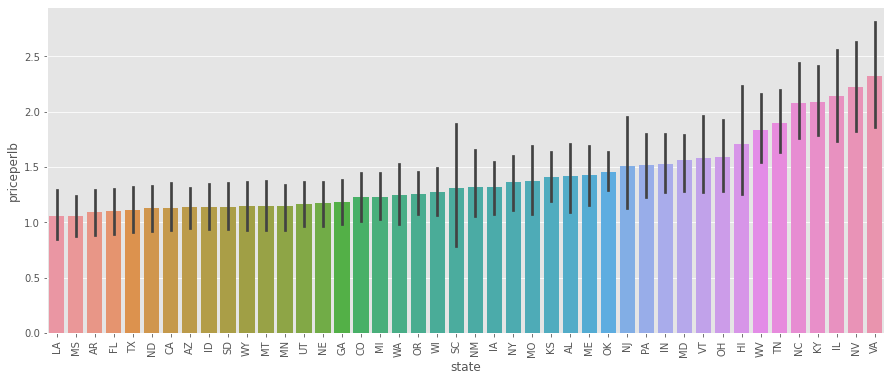

In [242]:
plt.figure(figsize = (15,6)) # To resize the plot
sns.barplot(data = df, x = "state", y = "priceperlb",
            order=df.groupby('state').priceperlb.mean().sort_values(ascending = True).index)
plt.xticks(rotation=90) 
plt.show()# To rotate the x axis lables

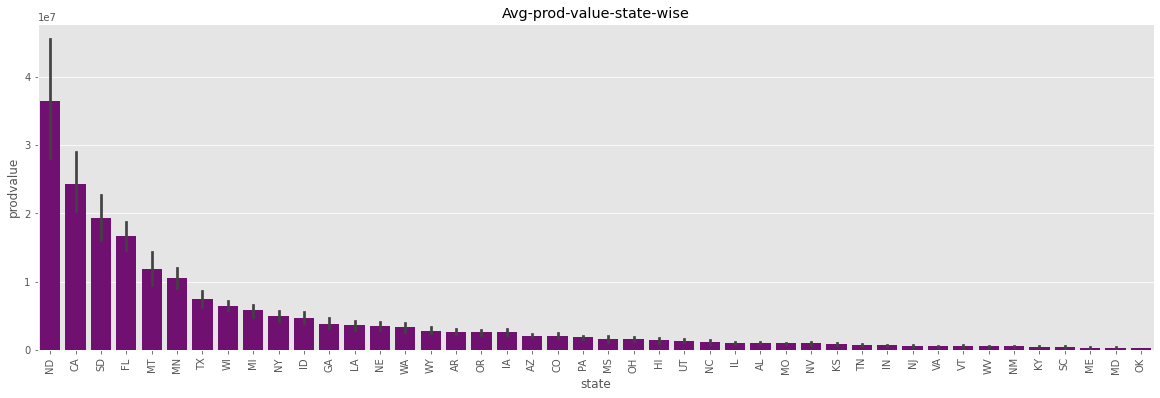

In [215]:
plt.figure(figsize = (20,6)) # To resize the plot
sns.barplot(data = df, x = "state", y = "prodvalue", color = "purple",
            order=df.groupby('state').prodvalue.mean().sort_values(ascending = False).index)
plt.title('Avg-prod-value-state-wise')
plt.xticks(rotation=90)
plt.show()# To rotate the x axis lables

##### Inference:
Yes, the average production value for states: ['ND','SD','CA','MT','WI','FL','NE','MI'] was higher because of which average price per pound was lesser

### Conclusion